## NN project

|Name                  |ID       |
|:-------------------- |:------- |
| Ahmed Ashraf Mohamed | 2103134 |
| Ahmed Yousri Ali     | 2103108 |



# Step 1

In [ ]:
# Importing CSV from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
# The Optimizer library
import torch.optim as optim
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt # Plotting library


In [ ]:
# Read csv in pandas
train_dataset = pd.read_csv("/content/drive/MyDrive/MNIST/train.csv") 

In [ ]:
# Displaying the dataset
train_dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting the features from the output
X = train_dataset.drop(columns='label')
y = train_dataset['label']
# train, validation split, with training size of 80% and validation size of 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, train_size = .80)

In [ ]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# making sure that the output is in the correct form
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [ ]:
# Chaning the indecies of the data to be able to use them as dataloaders
X_train.index = range(len(X_train))
y_train.index = range(len(y_train))

X_val.index = range(len(X_val))
y_val.index = range(len(y_val))

In [ ]:
class DataGenerator(Dataset):
    """ Convert the pandas into a Dataset Object """
    def __init__(self, data, label):
        self.data = data
        self.label = label
        self.length = len(data.index)
    
    def __getitem__(self, index):
        data_tensor = torch.Tensor(self.data.iloc[index].values)
        label = self.label[index]
        return (data_tensor, label)
    
    def __len__(self):
        return self.length

In [ ]:
# converting each of tranning data and validation data into dataset object
data_train = DataGenerator(X_train,y_train)
data_val = DataGenerator(X_val, y_val)

In [ ]:
# Making sure of the Number of samples contained in each Dataset object
print('Train samples:', data_train.__len__())
print('Validation samples:', data_val.__len__())

Train samples: 33600
Validation samples: 8400


In [ ]:
# Creating the DataLoader object to be used in the Neural network
train_loader = torch.utils.data.DataLoader(data_train, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=64, shuffle=False)

In [ ]:
train_loader.dataset[0][1]

6

# Step 2

In [ ]:
def fit(model,train_loader, val_loader, epochs,learning_rate=0.01, loss_func=nn.CrossEntropyLoss()):
    """ Fit the model """
    # Store the training performance
    train_loss = np.zeros(epochs)
    train_acc = np.zeros(epochs)
    valid_loss = np.zeros(epochs)
    valid_acc = np.zeros(epochs)

    # Intialize the optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        start = time.time()
        print('Epoch:', epoch+1)
        
        # Training
        train_correct = 0
        train_examples = 0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            output = model(inputs)
            loss = loss_func(output, targets)
            loss.backward()
            optimizer.step()
            train_loss[epoch] += loss.data.item()*inputs.size(0)
            # correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            correct = torch.eq(torch.max(output, dim=1)[1], targets)
            train_correct += torch.sum(correct).item()
            train_examples += correct.shape[0]
        train_loss[epoch] /= len(train_loader.dataset)
        train_acc[epoch] = train_correct/train_examples
        
        # Validation
        valid_correct = 0
        valid_examples = 0
        model.eval()
        for batch in val_loader:
            inputs, targets = batch
            output = model(inputs)
            loss = loss_func(output, targets)
            valid_loss[epoch] += loss.data.item()*inputs.size(0)
            # correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
            correct = torch.eq(torch.max(output, dim=1)[1], targets)
            valid_correct += torch.sum(correct).item()
            valid_examples += correct.shape[0]
        valid_loss[epoch] /= len(val_loader.dataset)
        valid_acc[epoch] = valid_correct/valid_examples
        
        # Write Output
        end = time.time()
        print('\t Time: {:.2f} sec' .format(end - start))
        print('\t Train Loss: {:.3f}, Acc: {:.2f}' .format(train_loss[epoch], train_acc[epoch]))
        print('\t Valid Loss: {:.3f}, Acc: {:.2f}' .format(valid_loss[epoch], valid_acc[epoch]))
        
        # Write the training perfomance values into a dictionary
        history = {'train_loss': train_loss, 'train_acc': train_acc, 'valid_loss': valid_loss, 'valid_acc': valid_acc}
    return history


def prediction(model, val_loader):
    """ Predict the test data """
    
    model.eval()
    y_test = torch.LongTensor()
    for i, data in enumerate(val_loader):
        data = Variable(data[0])
        output = model(data)
        pred = output.data.max(1)[1]
        y_test = torch.cat((y_test, pred), dim=0)
    return y_test

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        torch.manual_seed(42) #Intialize weight
        
        self.linear1 = nn.Linear(784,128) #Input layer to 1st hidden layer
        self.relu1 = nn.ReLU() # Activation function for input layer

        self.linear2 = nn.Linear(128,64) # 1st hidden layer to 2nd hidden layer
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(64,10) #2nd hidden layer to output

           
    def forward(self, x): 
        """Feed forward loop"""
        out = self.linear1(x)
        out = self.relu1(out)

        out= self.linear2(out)
        out = self.relu2(out)

        out = self.linear3(out)

        return out #Output layer

In [ ]:
# Intialize the model
model = MyModel()
model

MyModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
#Display model's weight
model.linear1.weight

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [ ]:
# Train and validate the data
history = fit(model,train_loader, val_loader, epochs=10) #Cross entropy is multi category so it already has softmax

Epoch: 1
	 Time: 4.88 sec
	 Train Loss: 1.199, Acc: 0.75
	 Valid Loss: 0.436, Acc: 0.88
Epoch: 2
	 Time: 8.81 sec
	 Train Loss: 0.465, Acc: 0.88
	 Valid Loss: 0.384, Acc: 0.90
Epoch: 3
	 Time: 5.31 sec
	 Train Loss: 0.430, Acc: 0.89
	 Valid Loss: 0.463, Acc: 0.89
Epoch: 4
	 Time: 5.70 sec
	 Train Loss: 0.431, Acc: 0.89
	 Valid Loss: 0.470, Acc: 0.90
Epoch: 5
	 Time: 6.35 sec
	 Train Loss: 0.419, Acc: 0.90
	 Valid Loss: 0.411, Acc: 0.90
Epoch: 6
	 Time: 5.33 sec
	 Train Loss: 0.477, Acc: 0.89
	 Valid Loss: 0.489, Acc: 0.87
Epoch: 7
	 Time: 6.61 sec
	 Train Loss: 0.458, Acc: 0.89
	 Valid Loss: 0.463, Acc: 0.90
Epoch: 8
	 Time: 5.55 sec
	 Train Loss: 0.449, Acc: 0.89
	 Valid Loss: 0.426, Acc: 0.90
Epoch: 9
	 Time: 6.37 sec
	 Train Loss: 0.399, Acc: 0.90
	 Valid Loss: 0.427, Acc: 0.90
Epoch: 10
	 Time: 5.78 sec
	 Train Loss: 0.427, Acc: 0.89
	 Valid Loss: 0.520, Acc: 0.88


In [ ]:
# Plotting function for 1 dictionary
def plotting(hist):
  plt.subplot(2,2,1)
  plt.title("Train Loss plot")
  plt.plot(range(len(hist['train_loss'])),hist['train_loss']) #range is number of epochs
  plt.xlabel("Number of Iterations")
  plt.ylabel("Train Loss")

  plt.subplot(2,2,3)
  plt.title("Train Accuracy plot")
  plt.plot(range(len(hist['train_acc'])),hist['train_acc'])
  plt.xlabel("Number of Iterations")
  plt.ylabel("Train Accuracy")

  plt.subplot(2,2,2)
  plt.title("Validation Loss plot")
  plt.plot(range(len(hist['valid_loss'])),hist['valid_loss'])
  plt.xlabel("Number of Iterations")
  plt.ylabel("Validation Loss")

  plt.subplot(2,2,4)
  plt.title("Validation Accuracy plot")
  plt.plot(range(len(hist['valid_acc'])),hist['valid_acc'])
  plt.xlabel("Number of Iterations")
  plt.ylabel("Validation Accuracy")


  plt.subplots_adjust(left=0.1,
                      bottom=0.1,
                      right=0.9,
                      top=0.9,
                      wspace=0.8,
                      hspace=1)
  plt.show()
  return 0

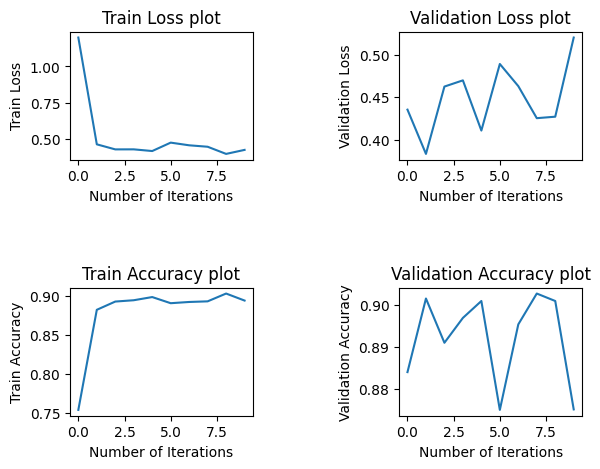

0

In [ ]:
plotting(history)

# Step 3

In [ ]:
class DLModel(nn.Module):
    def __init__(self,Prob):
        super(DLModel, self).__init__()
        torch.manual_seed(42) #Intialize weight

        self.linear1 = nn.Linear(784,128) #Input layer to 1st hidden layer
        self.norm1 = nn.LayerNorm(128) # Normalize the layer before nonlinearity layer
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=Prob) # Drop out after nonlinearity and normalization

        self.linear2 = nn.Linear(128,64)
        self.norm2 = nn.LayerNorm(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=Prob)

        self.linear3 = nn.Linear(64,10)
    def forward(self, x):

        out = self.linear1(x)
        out = self.norm1(out)
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.linear2(out)
        out = self.norm2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        
        out = self.linear3(out)
        return out

In [ ]:
# Intialize the DL model with probabilty of 20% drop layer
DLmodel = DLModel(0.2)
DLmodel

DLModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
DLmodel.linear1.weight

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [ ]:
DLhistory = fit(DLmodel,train_loader, val_loader, epochs=10)

Epoch: 1
	 Time: 5.23 sec
	 Train Loss: 0.370, Acc: 0.89
	 Valid Loss: 0.171, Acc: 0.95
Epoch: 2
	 Time: 6.20 sec
	 Train Loss: 0.190, Acc: 0.94
	 Valid Loss: 0.142, Acc: 0.96
Epoch: 3
	 Time: 4.91 sec
	 Train Loss: 0.146, Acc: 0.96
	 Valid Loss: 0.134, Acc: 0.96
Epoch: 4
	 Time: 6.72 sec
	 Train Loss: 0.128, Acc: 0.96
	 Valid Loss: 0.116, Acc: 0.96
Epoch: 5
	 Time: 5.00 sec
	 Train Loss: 0.114, Acc: 0.97
	 Valid Loss: 0.114, Acc: 0.96
Epoch: 6
	 Time: 5.09 sec
	 Train Loss: 0.099, Acc: 0.97
	 Valid Loss: 0.111, Acc: 0.97
Epoch: 7
	 Time: 6.33 sec
	 Train Loss: 0.094, Acc: 0.97
	 Valid Loss: 0.100, Acc: 0.97
Epoch: 8
	 Time: 5.19 sec
	 Train Loss: 0.084, Acc: 0.97
	 Valid Loss: 0.101, Acc: 0.97
Epoch: 9
	 Time: 6.13 sec
	 Train Loss: 0.082, Acc: 0.97
	 Valid Loss: 0.105, Acc: 0.97
Epoch: 10
	 Time: 5.18 sec
	 Train Loss: 0.077, Acc: 0.98
	 Valid Loss: 0.112, Acc: 0.97


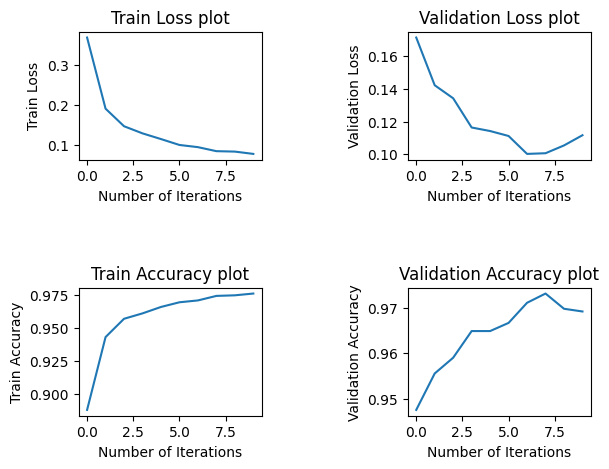

0

In [ ]:
plotting(DLhistory)

In [ ]:
#Plotting for multiple number of dictionaries for comparing
def compare(*args):
    num_models = len(args) // 2

    name = []
    for i in range(num_models,len(args)):
      name.append(args[i])
      
    plt.subplots(2, 2, figsize=(8, 8))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.8, hspace=0.8)

    plt.subplot(2,2,1)
    plt.title("Train Loss plot")
    for j in range(0,num_models):
      plt.plot(range(len(args[j]['train_loss'])), args[j]['train_loss'])
    plt.legend(name)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Train Loss")

    plt.subplot(2,2,3)
    plt.title("Train Accuracy plot")
    for j in range(num_models):
      plt.plot(range(len(args[j]['train_acc'])),args[j]['train_acc'])
    plt.legend(name)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Train Accuracy")

    plt.subplot(2,2,2)
    plt.title("Validation Loss plot")
    for j in range(num_models):
      plt.plot(range(len(args[j]['valid_loss'])),args[j]['valid_loss'])
    plt.legend(name)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Validation Loss")

    plt.subplot(2,2,4)
    plt.title("Validation Accuracy plot")
    for j in range(num_models):
      plt.plot(range(len(args[j]['valid_acc'])),args[j]['valid_acc'])
    plt.legend(name)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Validation Accuracy")

    plt.show()
    return 0

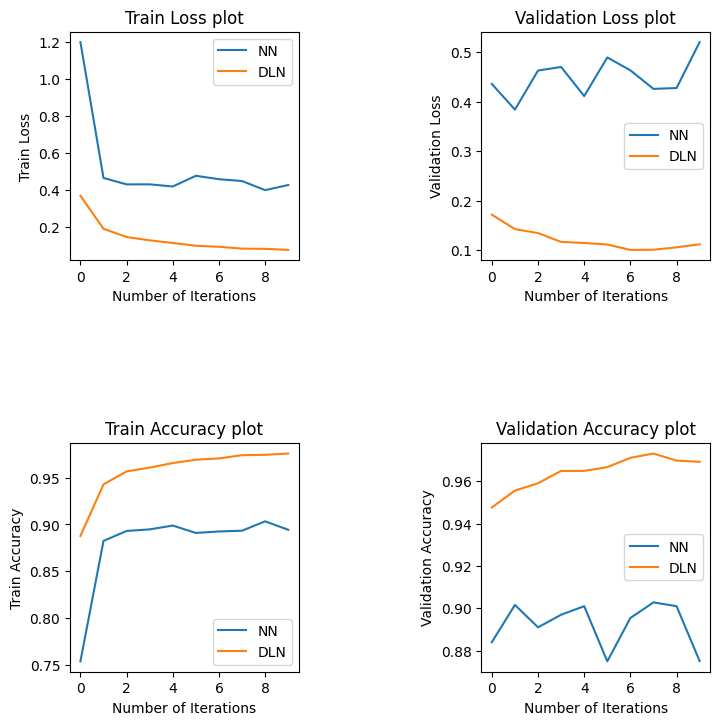

0

In [ ]:
# Comparison between NN and 0.2 Dropout layer
compare(history , DLhistory,"NN","DLN")

# Step 4

## Learning Rate = 0.001 , DL = 0.2

In [ ]:
# Intialize the DL model with probabilty of 20% drop layer
Model1 = DLModel(0.2)
Model1

DLModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Display weights
Model1.linear1.weight

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [ ]:
# Train and validate model with 20% DL and learning rate = 0.001
history1 = fit(Model1,train_loader, val_loader, epochs=10,learning_rate=0.001)

Epoch: 1
	 Time: 5.65 sec
	 Train Loss: 0.446, Acc: 0.89
	 Valid Loss: 0.195, Acc: 0.94
Epoch: 2
	 Time: 5.80 sec
	 Train Loss: 0.200, Acc: 0.94
	 Valid Loss: 0.149, Acc: 0.95
Epoch: 3
	 Time: 5.06 sec
	 Train Loss: 0.155, Acc: 0.96
	 Valid Loss: 0.126, Acc: 0.96
Epoch: 4
	 Time: 6.31 sec
	 Train Loss: 0.130, Acc: 0.96
	 Valid Loss: 0.116, Acc: 0.96
Epoch: 5
	 Time: 5.12 sec
	 Train Loss: 0.113, Acc: 0.97
	 Valid Loss: 0.105, Acc: 0.97
Epoch: 6
	 Time: 5.44 sec
	 Train Loss: 0.099, Acc: 0.97
	 Valid Loss: 0.117, Acc: 0.96
Epoch: 7
	 Time: 5.98 sec
	 Train Loss: 0.090, Acc: 0.97
	 Valid Loss: 0.111, Acc: 0.97
Epoch: 8
	 Time: 4.97 sec
	 Train Loss: 0.083, Acc: 0.97
	 Valid Loss: 0.103, Acc: 0.97
Epoch: 9
	 Time: 6.47 sec
	 Train Loss: 0.076, Acc: 0.98
	 Valid Loss: 0.101, Acc: 0.97
Epoch: 10
	 Time: 4.98 sec
	 Train Loss: 0.068, Acc: 0.98
	 Valid Loss: 0.105, Acc: 0.97


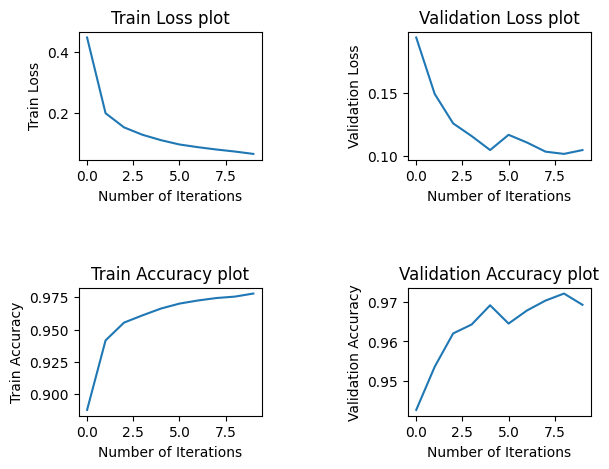

0

In [ ]:
#Plotting the model
plotting(history1)

## Learning Rate = 0.0005 , DL: 0.4

In [ ]:
# Intialize the DL model with probabilty of 40% drop layer
Model2 = DLModel(0.4)
Model2

DLModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.4, inplace=False)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.4, inplace=False)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# Display weights
Model2.linear1.weight

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [ ]:
# Train and validate model with 40% DL and learning rate = 0.0005
history2 = fit(Model2,train_loader, val_loader, epochs=10,learning_rate=0.0005)

Epoch: 1
	 Time: 5.74 sec
	 Train Loss: 0.762, Acc: 0.81
	 Valid Loss: 0.259, Acc: 0.93
Epoch: 2
	 Time: 6.60 sec
	 Train Loss: 0.357, Acc: 0.90
	 Valid Loss: 0.197, Acc: 0.94
Epoch: 3
	 Time: 5.12 sec
	 Train Loss: 0.291, Acc: 0.92
	 Valid Loss: 0.176, Acc: 0.95
Epoch: 4
	 Time: 6.31 sec
	 Train Loss: 0.254, Acc: 0.93
	 Valid Loss: 0.156, Acc: 0.95
Epoch: 5
	 Time: 4.95 sec
	 Train Loss: 0.229, Acc: 0.93
	 Valid Loss: 0.148, Acc: 0.96
Epoch: 6
	 Time: 5.60 sec
	 Train Loss: 0.206, Acc: 0.94
	 Valid Loss: 0.139, Acc: 0.96
Epoch: 7
	 Time: 5.85 sec
	 Train Loss: 0.192, Acc: 0.95
	 Valid Loss: 0.127, Acc: 0.96
Epoch: 8
	 Time: 5.02 sec
	 Train Loss: 0.185, Acc: 0.95
	 Valid Loss: 0.132, Acc: 0.96
Epoch: 9
	 Time: 6.39 sec
	 Train Loss: 0.170, Acc: 0.95
	 Valid Loss: 0.131, Acc: 0.96
Epoch: 10
	 Time: 4.91 sec
	 Train Loss: 0.156, Acc: 0.96
	 Valid Loss: 0.120, Acc: 0.97


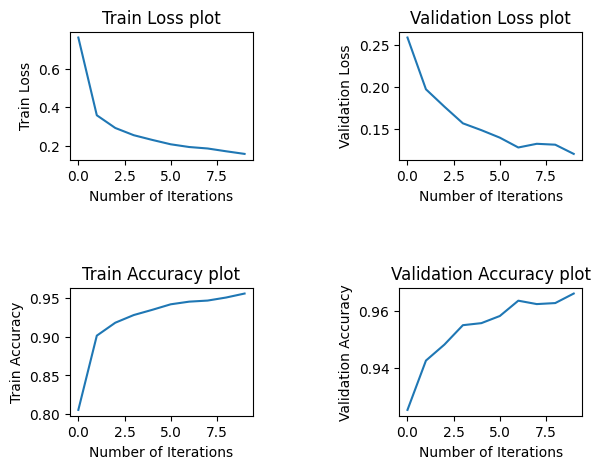

0

In [ ]:
#Plotting the model
plotting(history2)

## LR = 0.0001 , DL = 0.6

In [ ]:
# Intialize the DL model with probabilty of 60% drop layer
Model3 = DLModel(0.6)
Model3

DLModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.6, inplace=False)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.6, inplace=False)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
#Intialize the weight
Model3.linear1.weight

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0195,  0.0034,  0.0302,  ..., -0.0030, -0.0317,  0.0128],
        [-0.0107,  0.0221, -0.0158,  ..., -0.0121,  0.0042,  0.0318],
        [-0.0106,  0.0342,  0.0240,  ...,  0.0091,  0.0174,  0.0041]],
       requires_grad=True)

In [ ]:
# Train and validate model with 60% DL and learning rate = 0.0001
history3 = fit(Model3,train_loader, val_loader, epochs=10,learning_rate=0.0001)

Epoch: 1
	 Time: 5.62 sec
	 Train Loss: 1.766, Acc: 0.42
	 Valid Loss: 0.909, Acc: 0.86
Epoch: 2
	 Time: 5.83 sec
	 Train Loss: 1.145, Acc: 0.69
	 Valid Loss: 0.568, Acc: 0.89
Epoch: 3
	 Time: 5.19 sec
	 Train Loss: 0.875, Acc: 0.77
	 Valid Loss: 0.421, Acc: 0.90
Epoch: 4
	 Time: 6.67 sec
	 Train Loss: 0.732, Acc: 0.81
	 Valid Loss: 0.353, Acc: 0.91
Epoch: 5
	 Time: 4.93 sec
	 Train Loss: 0.643, Acc: 0.83
	 Valid Loss: 0.311, Acc: 0.92
Epoch: 6
	 Time: 5.52 sec
	 Train Loss: 0.599, Acc: 0.84
	 Valid Loss: 0.287, Acc: 0.92
Epoch: 7
	 Time: 5.85 sec
	 Train Loss: 0.562, Acc: 0.85
	 Valid Loss: 0.270, Acc: 0.92
Epoch: 8
	 Time: 4.90 sec
	 Train Loss: 0.533, Acc: 0.86
	 Valid Loss: 0.259, Acc: 0.93
Epoch: 9
	 Time: 6.18 sec
	 Train Loss: 0.510, Acc: 0.87
	 Valid Loss: 0.247, Acc: 0.93
Epoch: 10
	 Time: 4.95 sec
	 Train Loss: 0.476, Acc: 0.87
	 Valid Loss: 0.240, Acc: 0.93


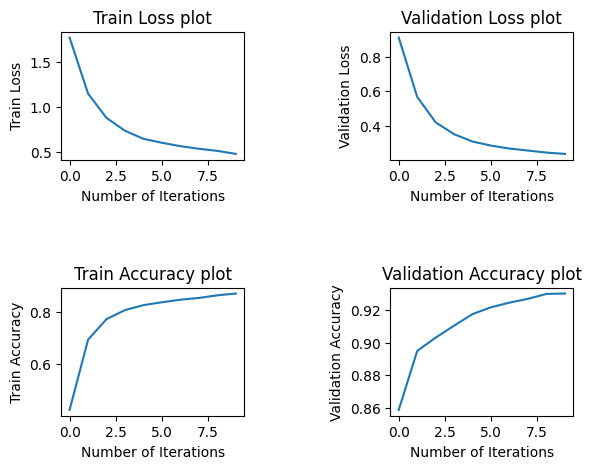

0

In [ ]:
# Ploting the model
plotting(history3)

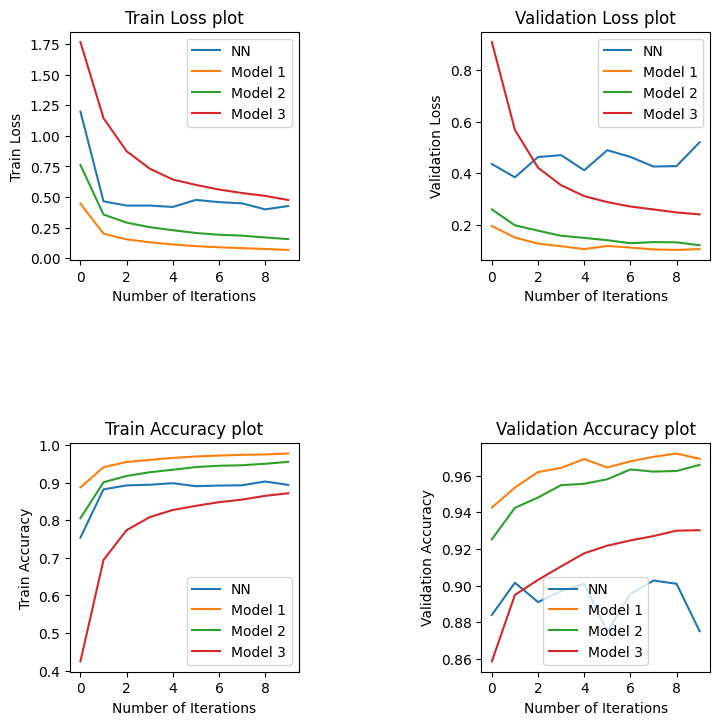

0

In [ ]:
# Comparison between first NN and all 3 changed attribute models
compare(history,history1,history2,history3,"NN","Model 1","Model 2","Model 3")